In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

(60000, 28, 28)
(60000, 28, 28, 1)


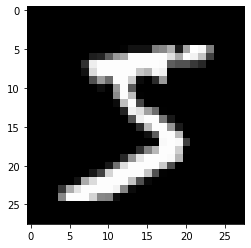

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

img = train_images[0]
plt.imshow(img, cmap='gray')

print(train_images.shape)

train_images = train_images.reshape(
    train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(
    test_images.shape[0], 28, 28, 1).astype('float32')

print(train_images.shape)

train_images = train_images / 255
test_imgaes = test_images / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
num_classes = test_labels.shape[1]

In [4]:
def baseline_Model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5),
                     input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )

    return model

In [5]:
my_Model = baseline_Model()
my_Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
__________________________________________________

In [6]:
my_Model.fit(train_images, train_labels,
             validation_data=(test_images, test_labels),
             epochs=10,
             batch_size=100,
             verbose=1
             )

scores = my_Model.evaluate(test_images, test_labels, verbose=0)

print("CNN Error:", (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.1866 - accuracy: 0.9460 - val_loss: 10.1320 - val_accuracy: 0.9747
Epoch 2/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0611 - accuracy: 0.9811 - val_loss: 8.7733 - val_accuracy: 0.9813
Epoch 3/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0429 - accuracy: 0.9868 - val_loss: 12.0961 - val_accuracy: 0.9775
Epoch 4/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0331 - accuracy: 0.9896 - val_loss: 9.6211 - val_accuracy: 0.9818
Epoch 5/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.0254 - accuracy: 0.9914 - val_loss: 12.9649 - val_accuracy: 0.9773
Epoch 6/10
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0216 - accuracy: 0.9927 - val_loss: 9.5498 - val_accuracy: 0.9832
Epoch 7/10
60000/60000 [=================

(1, 28, 28, 1)


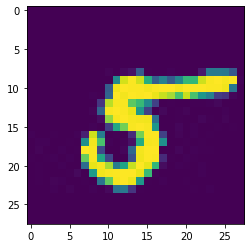

In [7]:
img_Path = "5.jpg"
%matplotlib inline

img = image.load_img(img_Path, color_mode='grayscale', target_size=(28, 28))

plt.imshow(img)

img_Tensor = image.img_to_array(img)
img_Tensor = np.expand_dims(img_Tensor, axis=0)

img_Tensor /= 255

print(img_Tensor.shape)

In [8]:
layer_Outputs = [layer.output for layer in my_Model.layers[:8]]
activation = models.Model(inputs=my_Model.input, outputs=layer_Outputs)

In [9]:
activations = activation.predict(img_Tensor)

In [10]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 24, 24, 32)


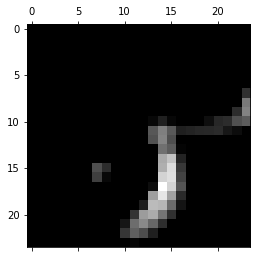

In [11]:
plt.matshow(first_layer_activation[0, :, :, 11], cmap='gray')
plt.show()

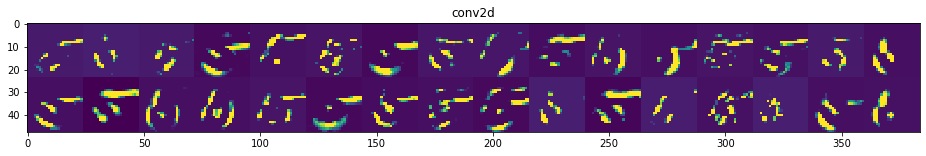

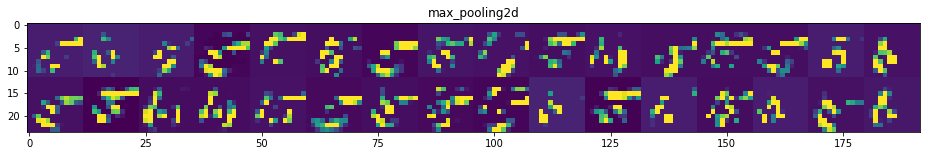

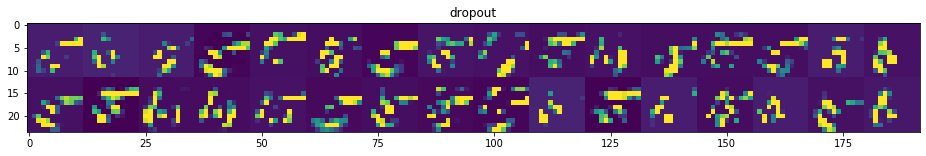

In [12]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in my_Model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col + 1) * size,
                         row * size: (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')

plt.show()